# Warsztaty Python w Data Science

---


> ## __"If it is written in Python, it's probably machine learning. If it is written in PowerPoint, it's probably AI"__
> ### <div style="text-align: right">— Mat Velloso, Technical Advisor to the CEO at Microsoft</div>

---

## Nauczanie Maszynowe

### 1. Wprowadzenie. Klasyfikacja
### 2. Walidacja krzyżowa. Regresja
### 3. Optymalizacja hiperparametrów. Grid Search
### 4. Nauczanie bez nadzoru. Klasteryzacja
### 5. Reinforcement Learning
---
## Machine Learning - część 1 z 5. Wprowadzenie. Klasyfikacja  

### Wprowadzenie
- #### Podstawowe pojęcia
- #### Kompromis między obciążeniem a wariancją
- #### Proces machine learning
- #### Przykład klasyfikacji
- #### Ocena wyników
- #### Rodzaje klasyfikatorów
---


![AI](img\AI1.png)


https://en.wikipedia.org/wiki/Machine_learning

---

## Nauczanie Maszynowe (_Machine Learning_)

- Z nadzorem (_supervised_)
- Bez nadzoru (_unsupervised_)
- Ze wzmocnieniem (_reinforcement_)

### Nauczanie Maszynowe bez nadzoru
- Klasteryzacja
- Reguły asocjacyjne

### Nauczanie Maszynowe z nadzorem
- Klasyfikacja 
- Regresja

---
​
### Nauczanie Maszynowe z nadzorem

Dla zmiennych tłumaczących `X` szukamy funkcji `f` która jak najlepiej odzwierciedli nam dane tłumaczone `y`
​
$$ 
y \approx f (X)
$$
​

---


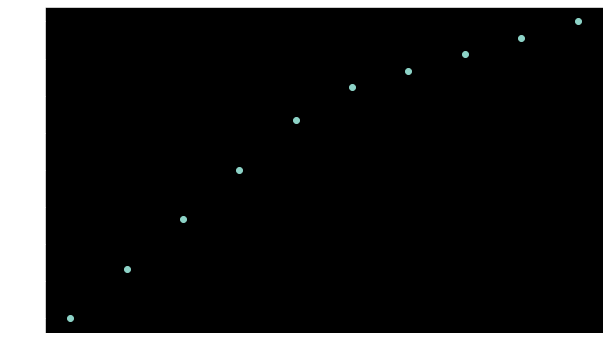

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
x = np.linspace(-1, 1, 10)
plt.scatter(x, x-0.5*np.abs(x));

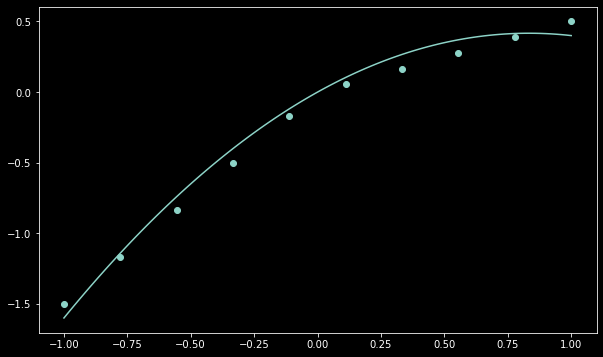

In [2]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
x = np.linspace(-1, 1, 10)
plt.scatter(x, x-0.5*np.abs(x))

x = np.linspace(-1, 1, 100)
plt.plot(x, x-0.6*x*x);

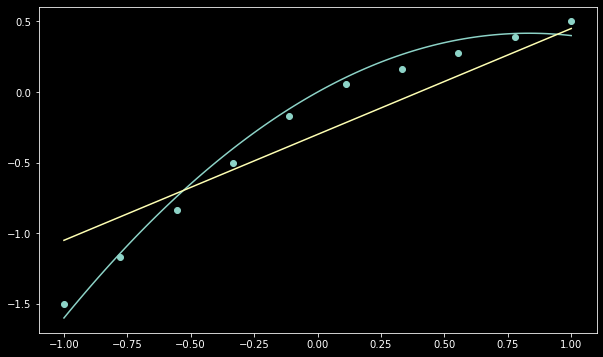

In [3]:
plt.figure(figsize=(10,6))
x = np.linspace(-1, 1, 10)
plt.scatter(x, x-0.5*np.abs(x));

x = np.linspace(-1, 1, 100)
plt.plot(x, x-0.6*x*x)
plt.plot(x, .75*x-0.3);

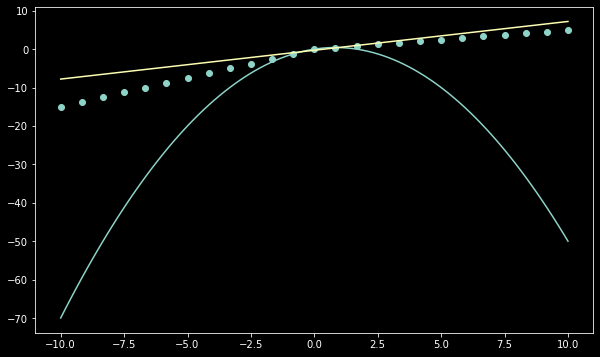

In [4]:
plt.figure(figsize=(10,6))
x = np.linspace(-10, 10, 25)
plt.scatter(x, x-0.5*np.abs(x))

x = np.linspace(-10, 10, 100)
plt.plot(x, x-0.6*x*x)
plt.plot(x, 0.75*x-0.3);

## Kompromis między obciążeniem a wariancją
### ang. *bias-variance tradeoff*

$$
Bias~[~\hat{f}(x)~] = E~[~\hat{f}(x)~] - f(x)
$$

$$
Var~[~\hat{f}(x)~] = E~[~\hat{f}(x)^2~] - E~[~\hat{f}(x)~]^2
$$


---
## Proces nauczania w Machine Learning

1. Przygotowanie danych
2. Podział danych
3. Budowanie modelu
4. Test dokładności

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [5]:
import pandas as pd
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [9]:
import matplotlib.pyplot as ab
import numpy as np
labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

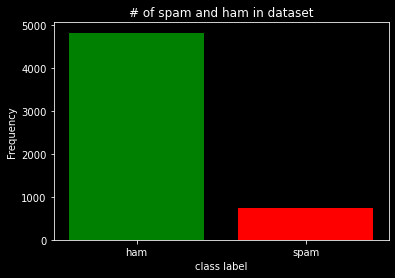

In [10]:
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts, color=["g", "r"]);

In [11]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [12]:
df.head()

,class_label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

In [15]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.tolist()

vectorizer = TfidfVectorizer(
   input= data,  
   lowercase=True,      
   stop_words='english' 
)
features_train_transformed = vectorizer.fit_transform(data)  
features_test_transformed  = vectorizer.transform(x_test) 

In [18]:
df = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names())
df.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ì_,ì¼1,ìï,ó_,û_,û_thanks,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
# Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
# train the model
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [31]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


In [21]:
from sklearn.svm import SVC
# train the model
classifier = SVC()
classifier.fit(features_train_transformed, y_train)

SVC()

In [32]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_train_transformed, y_train) * 100)) # ZBRODNIA NIESŁYCHANA

classifier accuracy 98.28%


In [23]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 97.43%


![PrecisionRecall](img\Precisionrecall.svg.png)


https://en.wikipedia.org/wiki/Precision_and_recall

Przykład:
    
- 990 "ham"
- 10 "spam"


Accuracy - dokładność - % prawidłowych odpowiedzi

- "Wszystko ham" - 99%

Precision - precyzja - jaki % poprawności odpowiedzi (błedy pierwszego rodzaju)

- "Wszystko ham" - 99% w ham, 0% w spam

Recall - zupełność - jaki % poprawnych znalazł (błedy pierwszego rodzaju)

- "Wszystko ham" - 100% w ham, 0% w spam

In [24]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1432    2]
 [  41  197]]
Accuracy Score : 0.9742822966507177
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1434
           1       0.99      0.83      0.90       238

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

F-Measure: 0.902


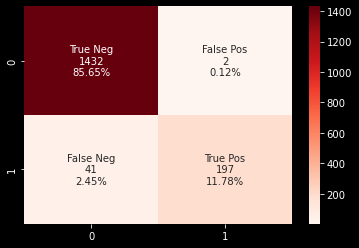

In [33]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

---
# Support Vector Machines

In [26]:
from sklearn.svm import SVC
# train the model
classifier = SVC()
classifier.fit(features_train_transformed, y_train)

SVC()

In [27]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 97.43%


In [28]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1432    2]
 [  41  197]]
Accuracy Score : 0.9742822966507177
Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1434
           1       0.99      0.83      0.90       238

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

F-Measure: 0.902


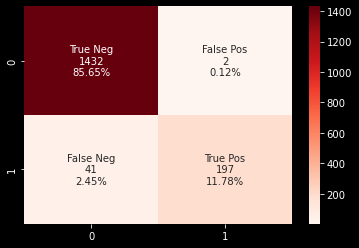

In [29]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

---
# Kompromis między jakością wyniku a interpretowalnością modelu

# Drzewa decyzyjne

In [34]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(random_state=0)
treeclf.fit(features_train_transformed, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


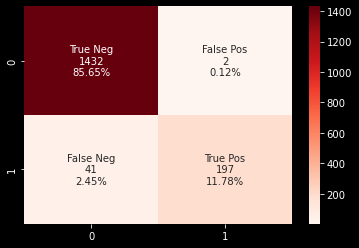

In [36]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds');

<Figure size 720x432 with 0 Axes>

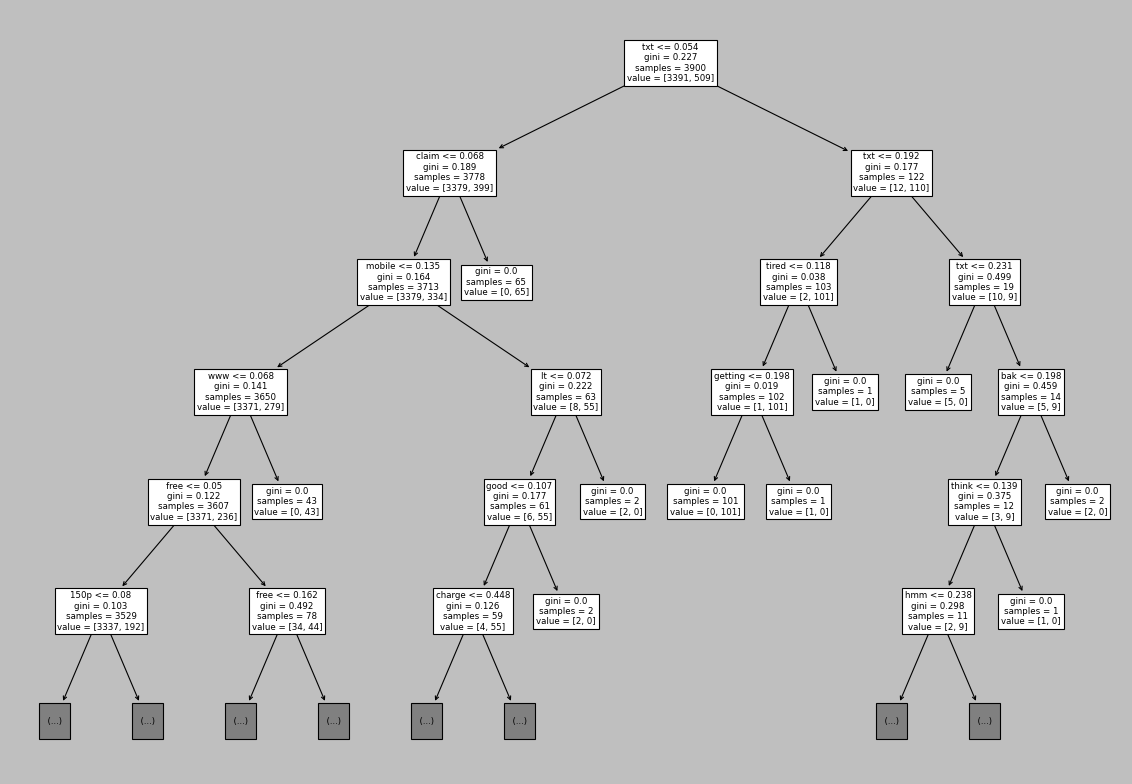

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.figure(figsize=(18,12))
tree.plot_tree(treeclf, max_depth=5, feature_names=df.columns);

# Dokonane uproszczenia
- ## Niewyczyszczone dane
- ## Niezbalansowane klasy
- ## Brak walidacji krzyżowej 

(ale to za tydzień...) 

https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870